## Observations and Insights

- The Capomulin regimen had the most data points and was among the lowest tumor volume mean values for mice subject to this specific treatment regimen. This suggests that along with Ramicane,this regimen could be among the most effective ones at reducing tumor volume overtime in SCC identified subjects.
- Except for a single case treated with Infubinol, the study did not yield potential outliers in the final tumor volume data across four of the most promising treatments (Capomulin, Ramicane, Infubinol and Ceftamin). The final tumor volumes observed in the Capomulin regimen suggests that this treatment yields better results at reducing tumor volume of SCC identified subjects than treatments such as Infubinol or Ceftamin.
- The study indicates a strong, positive correlation (R value = 0.84) between the mouse weight and the observed average tumor volume throughout the experiment in subjects treated under Capomulin regimen.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = mouse_metadata.merge(study_results, on = "Mouse ID")

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimes = complete_data["Drug Regimen"].unique()
means = []
medians = []
variances = []
stdev = []
sem = []
data_points = []

for regimen in drug_regimes:
    tumor_volume = complete_data["Tumor Volume (mm3)"].loc[complete_data["Drug Regimen"] == regimen]
    tumor_mean = tumor_volume.mean()
    tumor_median = tumor_volume.median()
    tumor_variance = tumor_volume.var()
    tumor_stdev = tumor_volume.std()
    tumor_sem = tumor_volume.sem()
    tumor_dp_count = tumor_volume.count()
    
    means.append(tumor_mean)
    medians.append(tumor_median)
    variances.append(tumor_variance)
    stdev.append(tumor_stdev)
    sem.append(tumor_sem)
    data_points.append(tumor_dp_count)

summary_stats = {"Drug Regimen": drug_regimes,
                 "Mean": means,
                 "Median": medians,
                "Variance": variances,
                "St. Dev.": stdev,
                "SEM": sem,
                "Total Data Points": data_points}

summary_stats_df = pd.DataFrame(summary_stats).sort_values("Total Data Points", ascending = False)
display(summary_stats_df[["Drug Regimen", "Mean", "Median", "Variance", "St. Dev.", "SEM"]].set_index("Drug Regimen"))

,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


## Bar plots

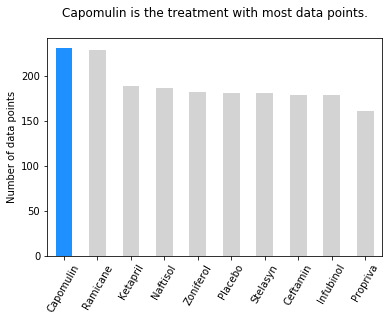

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen_values = complete_data["Drug Regimen"].value_counts()
drug_regimes_sorted = summary_stats_df["Drug Regimen"]

colors = []

#Identify the Capomulin treatment results in the data series to highlight in the final plot.

for regimen in drug_regimes_sorted:
    if regimen == "Capomulin":
        color = "dodgerblue"
    else:
        color = "lightgrey"
    colors.append(color)
    
plot = regimen_values.plot(kind = "bar", rot = 60, color = colors, title = "Capomulin is the treatment with most data points.\n")
plot.set_ylabel("Number of data points")
plot



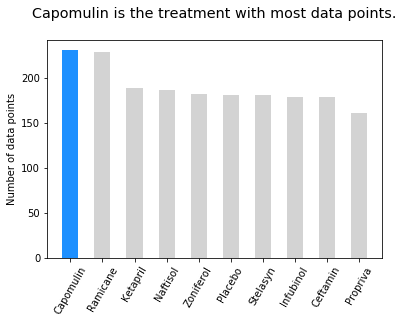

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = drug_regimes_sorted
plt.bar(x_axis, regimen_values, width = 0.5, color = colors)
plt.xticks(rotation = 60)
plt.ylabel("Number of data points")
plt.title("Capomulin is the treatment with most data points.\n", size = "x-large")
plt.show()

## Pie plots

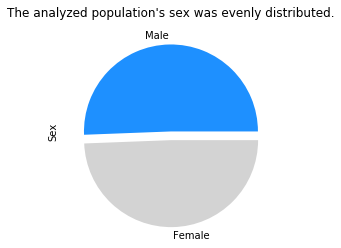

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_values = complete_data["Sex"].value_counts()
sex_values.plot.pie(y = sex_values, colors = ("dodgerblue", "lightgrey"), explode = (0,0.1), title = "The analyzed population's sex was evenly distributed.")

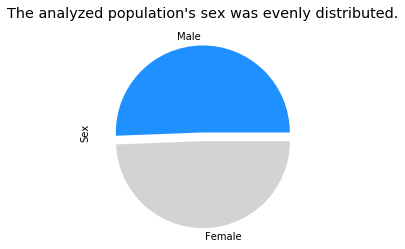

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
attributes = complete_data["Sex"].unique()
attribute_counts = complete_data["Sex"].value_counts()

plt.pie(sex_values, labels = attributes, colors = ("dodgerblue", "lightgrey"), explode = (0,0.1))
plt.title("The analyzed population's sex was evenly distributed.", size = "x-large")
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Summarize the data to obtain tumor volumes from only the final timepoints for each subject.
final_timepoints = pd.DataFrame(complete_data.groupby("Mouse ID")["Timepoint"].max())

final_volumes = final_timepoints.merge(complete_data, on = ["Mouse ID", "Timepoint"])
final_volumes = final_volumes[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]

#Calculate IQR and determine potential outliers for each regimen of interest.
analyzed_regimes = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

analyzed_regimes_dict = {}

for regimen in analyzed_regimes:
    print(regimen)
    regimen_set = final_volumes.loc[final_volumes["Drug Regimen"] == regimen, :]
    regimen_volumes = regimen_set["Tumor Volume (mm3)"]
    analyzed_regimes_dict[regimen] = regimen_volumes
    quantiles = regimen_volumes.quantile([0.25, 0.5, 0.75, 1])
    IQR = quantiles[0.75] - quantiles[0.25]
    
    print("IQR: " + str(IQR) + "\nPotencial outliers:")
    regimen_outliers = regimen_set.loc[(regimen_set["Tumor Volume (mm3)"] < quantiles[0.25] - 1.5 * IQR) |
                                         (regimen_set["Tumor Volume (mm3)"] > quantiles[0.75] + 1.5 * IQR),:]
    
    display(regimen_outliers)

Capomulin
IQR: 7.781863460000004
Potencial outliers:


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


Ramicane
IQR: 9.098536719999998
Potencial outliers:


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


Infubinol
IQR: 11.477135160000003
Potencial outliers:


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
31,c326,5,Infubinol,36.321346


Ceftamin
IQR: 15.577752179999997
Potencial outliers:


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


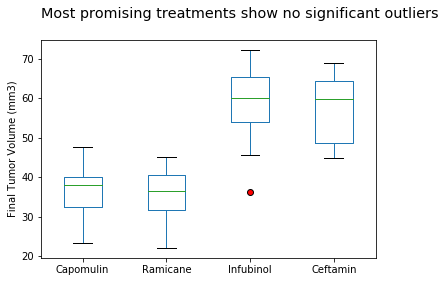

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
analyzed_regimes_df = pd.DataFrame(analyzed_regimes_dict)
analyzed_regimes_df.boxplot(grid = False, flierprops = dict(markerfacecolor = "r", marker = "o"))
plt.title("Most promising treatments show no significant outliers\n", loc = "left", size = "x-large")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and scatter plots

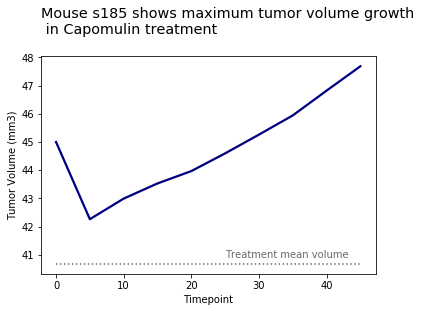

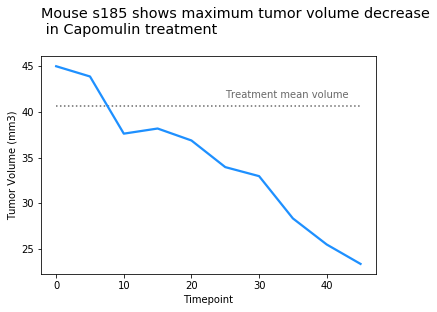

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin.
# Two lines were plotted for the maximum tumor development and decrease for reference.
capomulin_df = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin",:]
capomulin_finals = final_volumes.loc[final_volumes["Drug Regimen"] == "Capomulin",:].sort_values("Tumor Volume (mm3)", ascending = False)

#Data points for mouse with maximum volume growth
max_volume = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557", :]

#Data points for mouse with maximum volume decrease
min_volume = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", :]

time_values = max_volume["Timepoint"]
max_volume_values = max_volume["Tumor Volume (mm3)"]
plt.plot(time_values, max_volume_values, color = "navy", linewidth = 2.25)
plt.title("Mouse s185 shows maximum tumor volume growth\n in Capomulin treatment\n", size = "x-large", loc = "left")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.hlines(summary_stats["Mean"][1], 0, 45, color = "dimgray", linestyles = "dotted")
plt.text(25,40.9, "Treatment mean volume", color = "dimgray")
plt.show()

min_volume_values = min_volume["Tumor Volume (mm3)"]
plt.plot(time_values, min_volume_values, color  = "dodgerblue", linewidth = 2.25)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 shows maximum tumor volume decrease\n in Capomulin treatment\n", size = "x-large", loc = "left")
plt.hlines(summary_stats["Mean"][1], 0, 45, color = "dimgray", linestyles = "dotted")
plt.text(25,41.5, "Treatment mean volume", color = "dimgray")
plt.show()


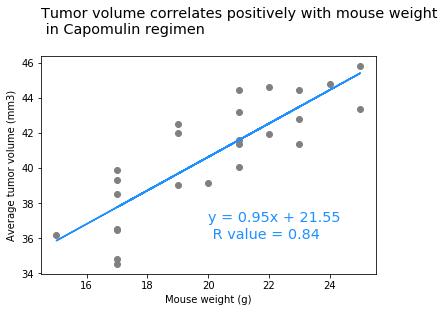

In [10]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
scatter_df = capomulin_df.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()
x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_values = slope * x_values + intercept

plt.scatter(x_values, y_values, color = "grey")
plt.plot(x_values, line_values, color = "dodgerblue")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.title("Tumor volume correlates positively with mouse weight\n in Capomulin regimen\n", size = "x-large", loc = "left")
plt.text(20, 36, f"y = {round(slope,2)}x + {round(intercept,2)}\n R value = {round(rvalue,2)}", color = "dodgerblue", size = "x-large")
plt.show()